# **Methods of Prediction Final Assignment**

### **Submitted by:** Aditya Rautela

### **Student Number:** GH1033598

### **Programme:** MSc Data Science, AI, and Digital Business

### **Submitted to:** Dr. Mohammad Madhavi

#💼 **Business Case**
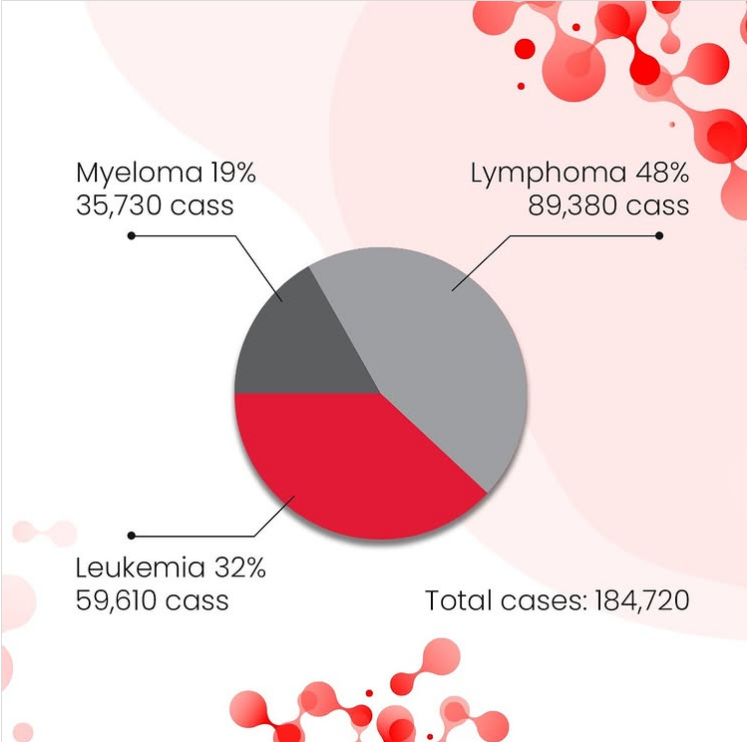

The modern generation is highly prone to growing deadly and fatel diseases which is because of certain habits, condition and lifestyle we currently live in. The scale of such fatel diseases has grown too much that as of 2024-25 we can see in the image above that there are total of **184,720** new cases of blood cancer. The growth is of such high level that its getting pretty difficult for the medical staff to takle such growing issue.

The blood contains certain cells within itself which are analysed so as to know what type of cancer does a person have developed.
Some of the cells are:

**Neutrophils:** These are the most abundent white blood cell and are the first responders to bacterial and fungai infection.   

**Eosinophils:** They a less common in blood and fights parasitic infection and modulate allergic reactions.

**Basophils:** They are the rerest white blood cell and are involved in allergic and inflammatory responses.

**Lymphocytes:** This the second most common white blood cell and are a key element in adaptive immunity.

**Monocytes:** They too are uncommon cells and work to circulate blood for a short period.

**Immature Granulocytes (promyelocytes, myelocytes, and metamyelocytes):** Generally found in bone marrow and are generally seen when body need fighters to fight pestogens.

**Erythroblasts:** They are the precursors to the red blood cells.  

**Platelets or Thrombocytes:** Work for blood clotting.

# 🔎 **Business Problem & Possible solution**

1. Fast pace increase in cases is creating a burdon for medical staff and cause early detection of cancer.

**Solution**: Use of neural network and automation to idetify the issue as soon as possible.

2. Chances of human error may be there.

**Solution**: Use of such automated system may decrease the chances of human error.

3. The workload and less efficiency of labs.

**Solution**: Using such development the potentials of all the labs can be increased across varied areas.

# 🎯 **Research objectives**

1. Create a model which helps in identifying potential changes in blood cells which help in easier blood cancer detection.

2. More reliable and accurate way to predict blood cancer in a patient.


# 🌍 **Source of data**

To attain the data set I have used Kaggle and the link for the data set is listed below:

https://www.kaggle.com/datasets/unclesamulus/blood-cells-image-dataset/data



# ⏹ **Data dimension**

The data is a collection of **17,092** images of an individual normal cells which contain neutrophils, eosinophils, basophils, lymphocytes, monocytes, immature granulocytes (promyelocytes, myelocytes, and metamyelocytes), erythroblasts and platelets or thrombocytes.

# 📚 **Importing libraries**

To gain insights into the data and to explore, clean, and visualise data we need to import certain libraries and also the data set we are going to perform out operations.

We also need certain libraires to utilise machine learning algorithums.

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adamax, Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, AveragePooling2D, Input, GlobalMaxPooling2D

np.random.seed(42)
tf.random.set_seed(42)

import warnings
warnings.filterwarnings('ignore')

# 🔽**Importing dataset from kaggle**

We need to import the dataset from the kaggle to the notebook.

In [ ]:
import kagglehub

path = kagglehub.dataset_download("unclesamulus/blood-cells-image-dataset")

print("Path to dataset files:", path)

100%|██████████| 268M/268M [00:02<00:00, 112MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/unclesamulus/blood-cells-image-dataset/versions/2


Now let's list the available data set imported from kaggle which is as follow:

In [ ]:
os.listdir(path)

['bloodcells_dataset']

To know what all elements the images are avaible in we will list the subdirectories inside the dataset.

In [ ]:
os.listdir(os.path.join(path, 'bloodcells_dataset'))

['eosinophil',
 'monocyte',
 'basophil',
 'lymphocyte',
 'platelet',
 'neutrophil',
 'erythroblast',
 'ig']

Now let's list the dataset directory and define our classes and lable

In [ ]:
data_directory = os.path.join(path, "bloodcells_dataset")

classes = os.listdir(data_directory)
print("Classes:", classes)

Classes: ['eosinophil', 'monocyte', 'basophil', 'lymphocyte', 'platelet', 'neutrophil', 'erythroblast', 'ig']


After defining them we need to store the path and labels of the dataset.

In [ ]:
image_paths = []
labels = []

for class_name in classes:
    class_dir = os.path.join(data_directory, class_name)
    for image_name in os.listdir(class_dir):
        image_paths.append(os.path.join(class_dir, image_name))
        labels.append(class_name)

Now we create a dataframe and see our dataframe

In [ ]:
df = pd.DataFrame({'image_path': image_paths, 'label': labels})

df.head()

,image_path,label
0,/root/.cache/kagglehub/datasets/unclesamulus/b...,eosinophil
1,/root/.cache/kagglehub/datasets/unclesamulus/b...,eosinophil
2,/root/.cache/kagglehub/datasets/unclesamulus/b...,eosinophil
3,/root/.cache/kagglehub/datasets/unclesamulus/b...,eosinophil
4,/root/.cache/kagglehub/datasets/unclesamulus/b...,eosinophil


# 🪚**Splitting the data into train, test and validate**

To prevent any sort of data leakage we will be doing data split at the first go.

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_test, df_val = train_test_split(df_test, test_size=0.2, stratify=df_test['label'], random_state=42)

print("df shape:", df.shape)
print("df_train shape:",df_train.shape)
print("df_test shape:",df_test.shape)
print("df_val shape:", df_val.shape)

df shape: (17092, 2)
df_train shape: (13673, 2)
df_test shape: (2735, 2)
df_val shape: (684, 2)


# 🔍**Data Exploration**

The code help us identify what all unique lables are there in the data and we got to know that the key elements we want to learn upon are there in the data and they are 8 in total.

In [ ]:
print(df_train['label'].unique())

print(len(df_train['label'].unique()))

['lymphocyte' 'platelet' 'erythroblast' 'neutrophil' 'monocyte'
 'eosinophil' 'ig' 'basophil']
8


Now we will see the total number of values each lable have and try to potray that in a bar diagram.

In [ ]:
labelscount = df_train['label'].value_counts().reset_index()
labelscount

,label,count
0,neutrophil,2672
1,eosinophil,2495
2,ig,2316
3,platelet,1867
4,erythroblast,1248
5,monocyte,1145
6,basophil,983
7,lymphocyte,947


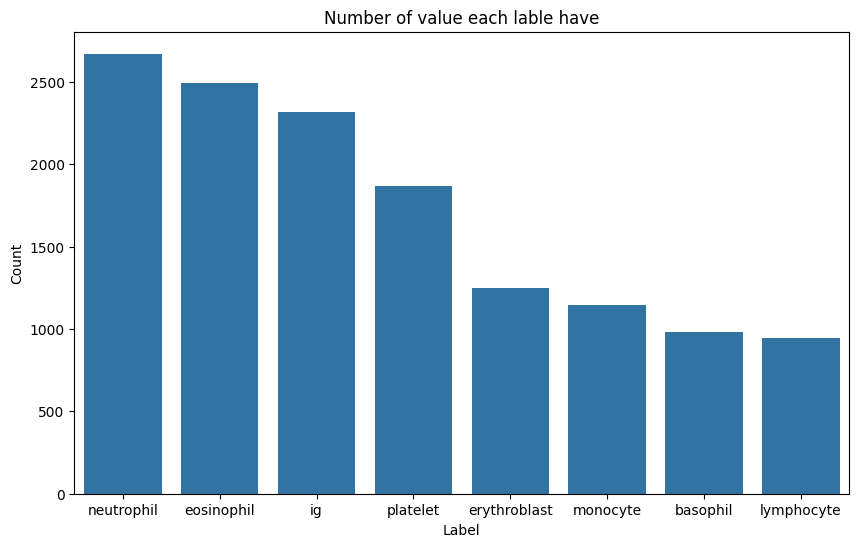

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='label', y='count', data=labelscount)

plt.title('Number of value each lable have')
plt.xlabel('Label')
plt.ylabel('Count')

plt.show()

As we studied the case above we knew that neutrophils which are the most abundent white blood cell and are the first responders to bacterial and fungai infection.  

# **⚙️Data Pre-Processing**

## 📲**Image preprocessing**

Now it's time to work on the images we have. We will have to normalize, resize and visualize the images we have to get a better understanding about our dataset.

Here we choose the bath size, image size for our data and predefined the shape of our data to get a standard size for our data.

In [ ]:
batch_size = 16
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

Now we need to train our machine to start visualizing our dataset into images which consist of the lable and are set to categorical so as to normalize them for one hot encoding. And we found valid images for each our our class/lable which we will further visualise.

In [ ]:
gen = ImageDataGenerator()
df_traingen = gen.flow_from_dataframe( df_train, x_col= 'image_path', y_col= 'label',
                                       target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, #False to keep the image augmentation as it is to shuffle the order
                                       batch_size= batch_size)

df_valgen = gen.flow_from_dataframe( df_val, x_col= 'image_path', y_col= 'label',
                                       target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True,
                                       batch_size= batch_size)

df_testgen = gen.flow_from_dataframe( df_test, x_col= 'image_path', y_col= 'label',
                                       target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= False, #False to keep the image augmentation as it is in the original order
                                       batch_size= batch_size)

Found 13673 validated image filenames belonging to 8 classes.
Found 684 validated image filenames belonging to 8 classes.
Found 2735 validated image filenames belonging to 8 classes.


From our imagegenerator we need to map the class name from the dictonary.

Define the class name from the dictonary as a list.

And thus we need to define the number of classes for the final dense layer of our neural network, which we can get from the number of keys from the training data generator.

In [ ]:
g_dict = df_traingen.class_indices

classes = list(g_dict.keys())

images, labels = next(df_traingen)


Now we will normalize the data set by dividing the image set by 255 and thus visualize the dataset.

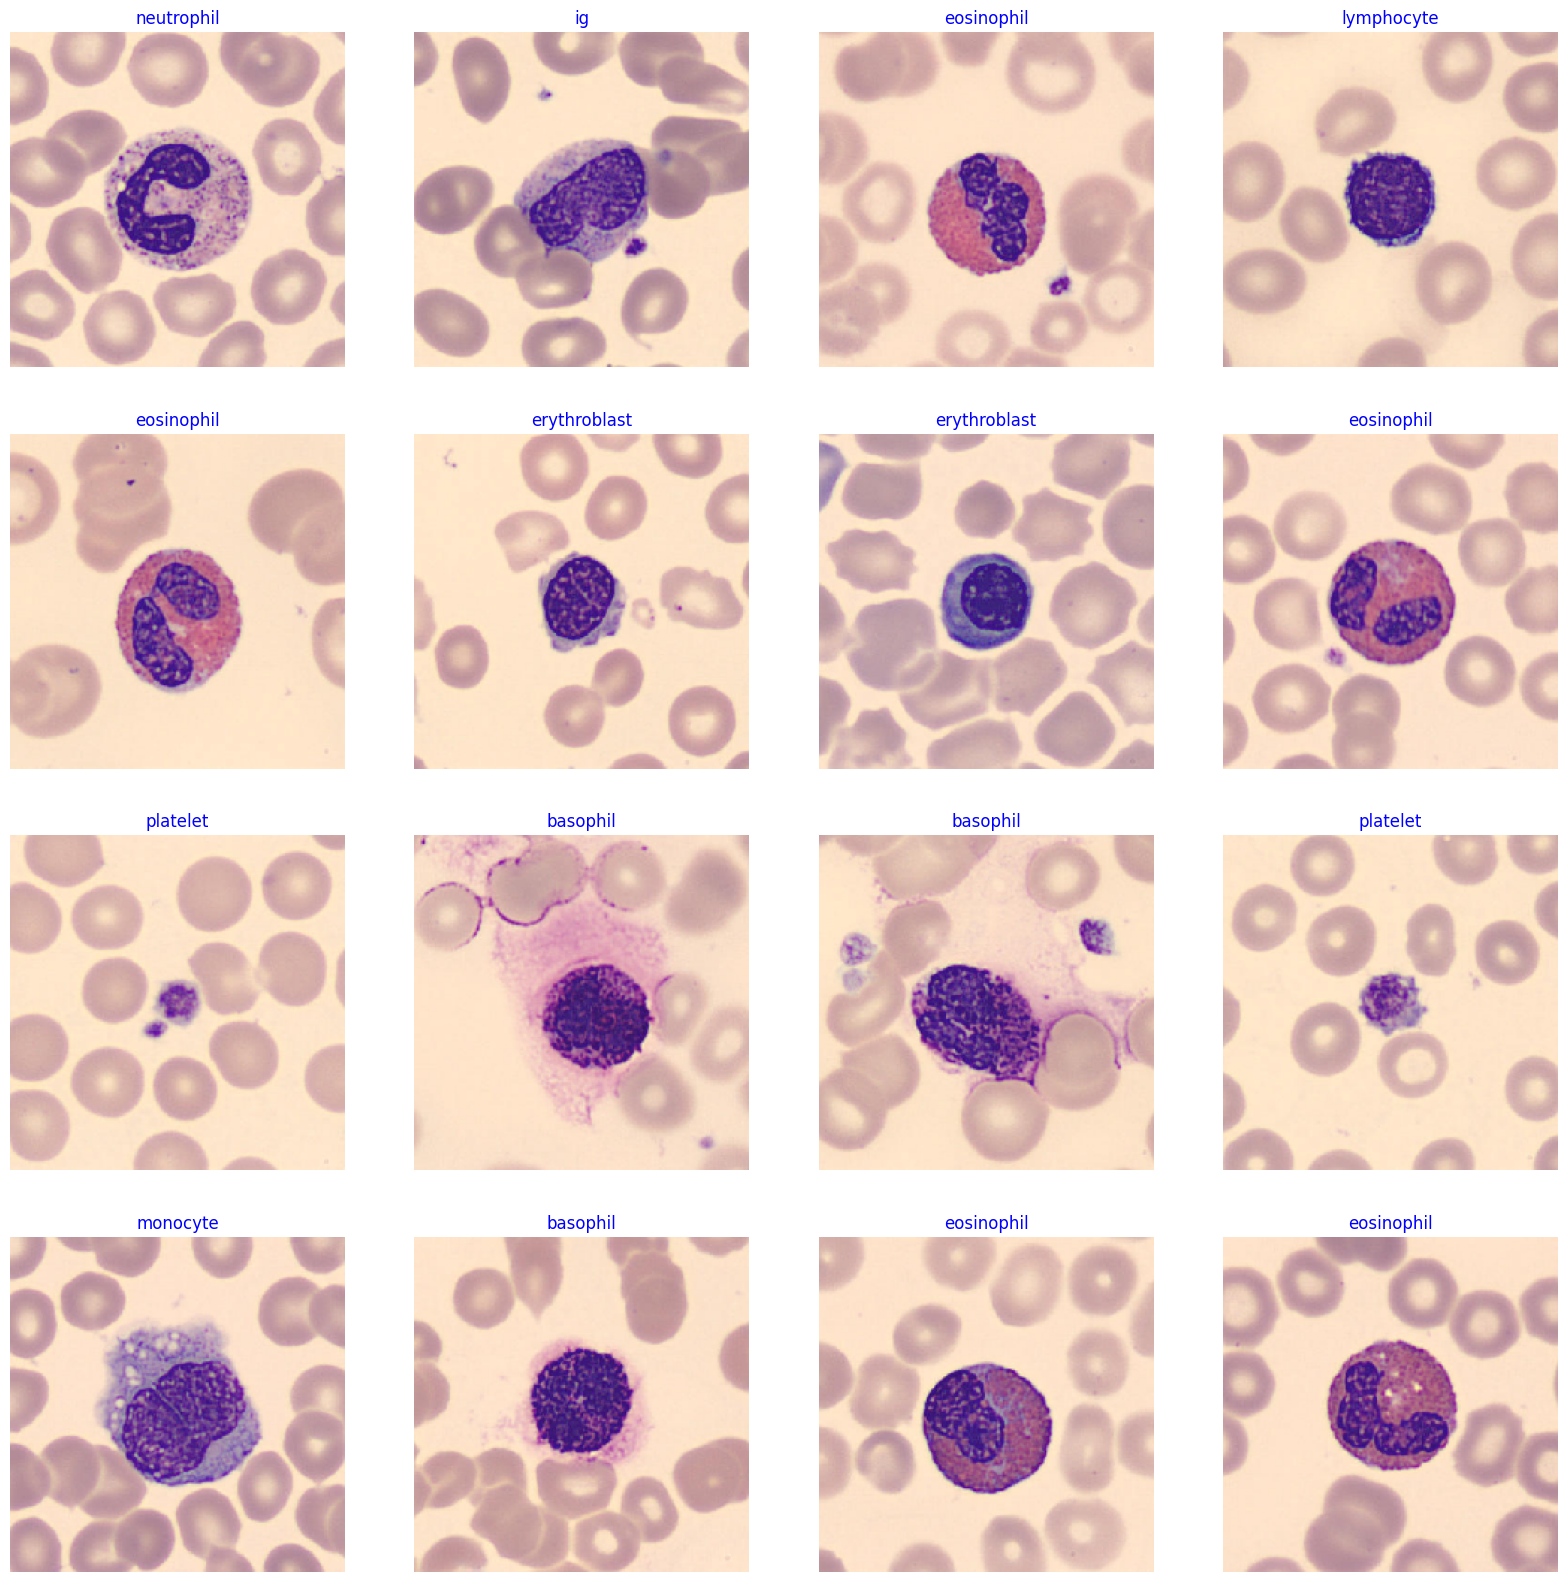

In [ ]:
plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255    #image normalizing
    plt.imshow(image)
    index = np.argmax(labels[i])
    class_name = classes[index]
    plt.title(class_name, color= 'blue', fontsize= 12)
    plt.axis('off')
plt.show()

##🤖 **Define Model**

Now we need to design and start build the architecture of the **Convolutional Neural Network (CNN)**.

Build the CNN model architecture using the specified layers and configurations.


We will start by defining the total number of classes in our dense layer and thus defining our model.

Here we will choose this model post experimentation. After 16 experiments on hyperparameters we get to know that this model is the best for us. We calculated this by the validation score we get. We calculated everything based validation score and the time taken on a certain GPU.

In [ ]:
class_count = len(list(df_traingen.class_indices.keys()))
model = Sequential([
    tf.keras.Input(shape=(img_size[0], img_size[1], channels)),
    tf.keras.layers.Rescaling(1./255),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),


    Flatten(),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dense(class_count, activation='softmax')
])

## ➕**Compile Model**

Compiling the model will help to understand that how it will learn and measure its performance. For that we use **Optimizer** to learn strategy, **loss function** to measures the mistakes, and metrics to track the progress.  


In [ ]:
model.compile(Adamax(learning_rate=1e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Let's see what our model has to say about the layers, output shape and the total number of parameters.

In [ ]:
model.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_19 (Rescaling)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_58 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_58 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_59 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_59 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_60 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_60 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_19 (Flatten)            │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 8)              │         2,056 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,246,728 (84.86 MB)

 Trainable params: 22,246,728 (84.86 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(df_traingen, epochs= 5, verbose= 1, validation_data= df_valgen, shuffle = True)

Epoch 1/5
855/855 ━━━━━━━━━━━━━━━━━━━━ 36s 38ms/step - accuracy: 0.5378 - loss: 1.4846 - val_accuracy: 0.8333 - val_loss: 0.4957
Epoch 2/5
855/855 ━━━━━━━━━━━━━━━━━━━━ 37s 36ms/step - accuracy: 0.8827 - loss: 0.3382 - val_accuracy: 0.9181 - val_loss: 0.2705
Epoch 3/5
855/855 ━━━━━━━━━━━━━━━━━━━━ 29s 34ms/step - accuracy: 0.9235 - loss: 0.2273 - val_accuracy: 0.9298 - val_loss: 0.1962
Epoch 4/5
855/855 ━━━━━━━━━━━━━━━━━━━━ 33s 38ms/step - accuracy: 0.9413 - loss: 0.1631 - val_accuracy: 0.9357 - val_loss: 0.1473
Epoch 5/5
855/855 ━━━━━━━━━━━━━━━━━━━━ 31s 36ms/step - accuracy: 0.9549 - loss: 0.1308 - val_accuracy: 0.9444 - val_loss: 0.1480


#**ABLATION EXPERIMEMTS**

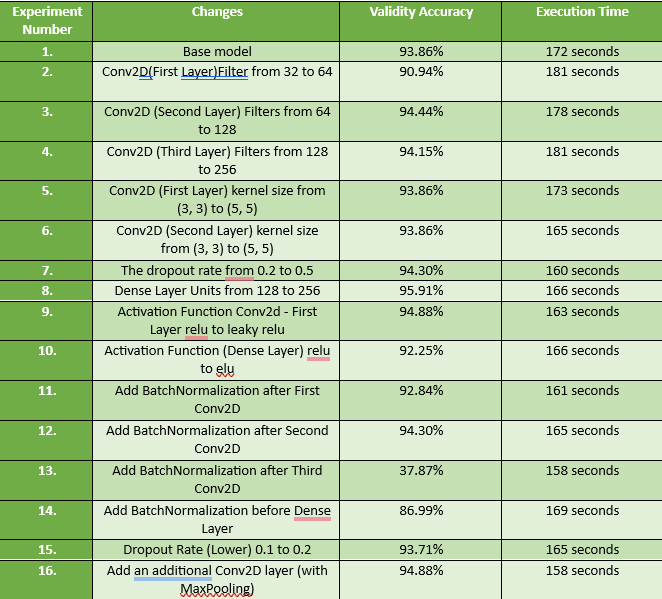

## 🧪 **Evaluate model**

Now we will see the train model performance on the test set using metric like precision, recall, f1-score. Helps to identify which classes are good to recognize and which one are not easy to identify the image.


Starting with defining the variables.

In [ ]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

Now we need to plot the training model to check the accuracy.

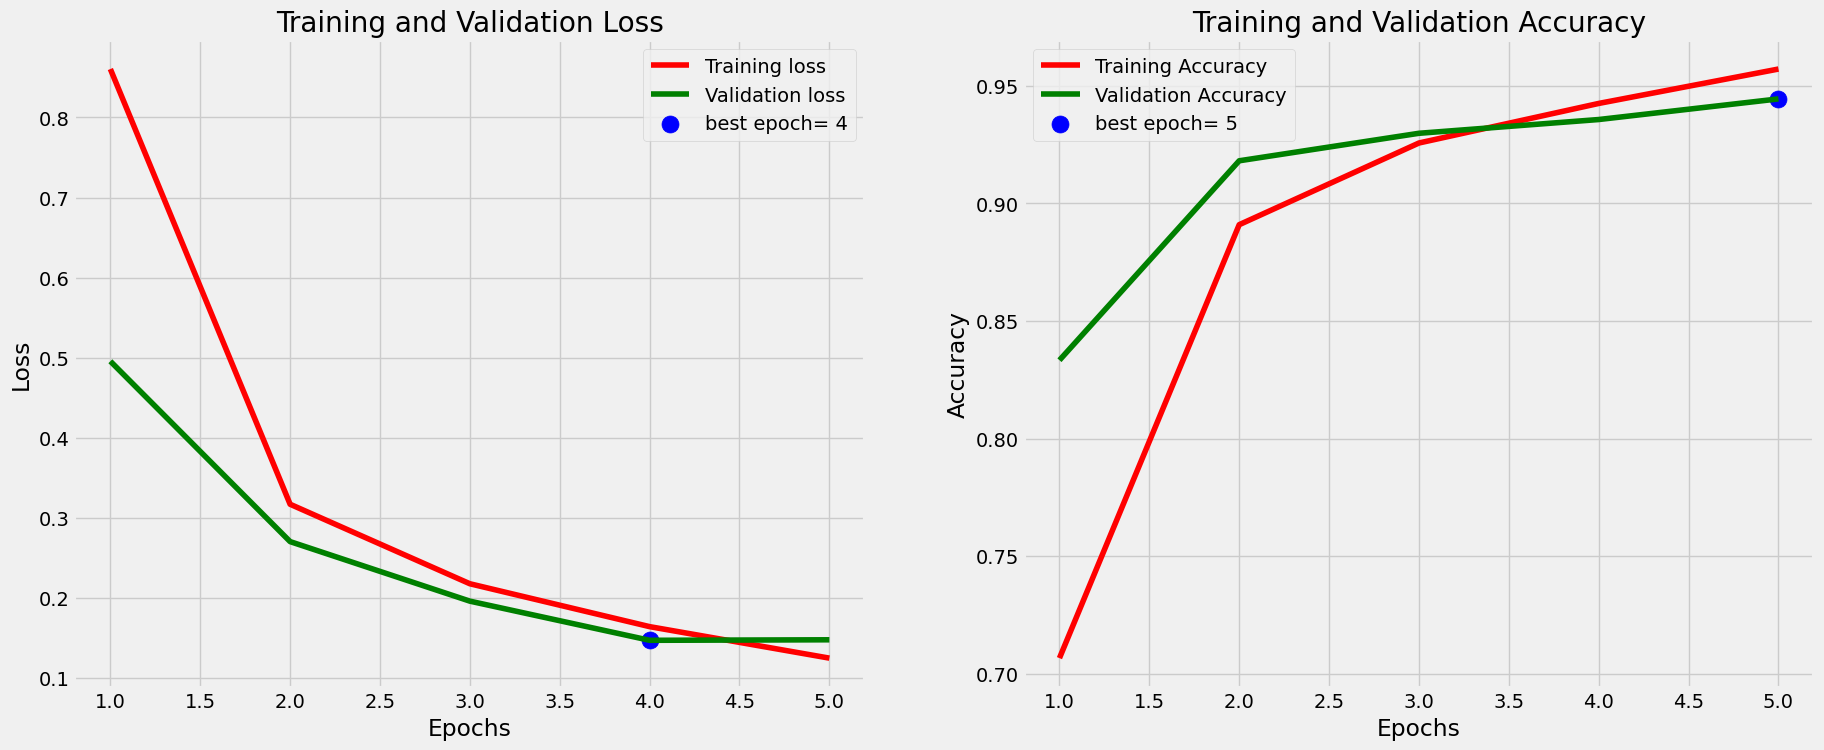

In [ ]:
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

The training and validate accuracy suggest that the model is well trained and is suitable for further implicating it into test data set.

Finally we need to test our model to the test set.

In [ ]:
ts_length = len(df_test)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model.evaluate(df_traingen, steps= test_steps, verbose= 1)
valid_score = model.evaluate(df_valgen, steps= test_steps, verbose= 1)
test_score = model.evaluate(df_testgen, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

547/547 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - accuracy: 0.9714 - loss: 0.0861
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9448 - loss: 0.1465  
547/547 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9350 - loss: 0.2104 
Train Loss:  0.08417540043592453
Train Accuracy:  0.9720063805580139
--------------------
Validation Loss:  0.14795270562171936
Validation Accuracy:  0.9444444179534912
--------------------
Test Loss:  0.20262493193149567
Test Accuracy:  0.9363802671432495


Now de need to define the prediction model using argmax.

In [ ]:
preds = model.predict(df_testgen)
y_pred = np.argmax(preds, axis=1)

171/171 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step


Now to know how the lable are performing against each other we need to prepare confusion matrix.

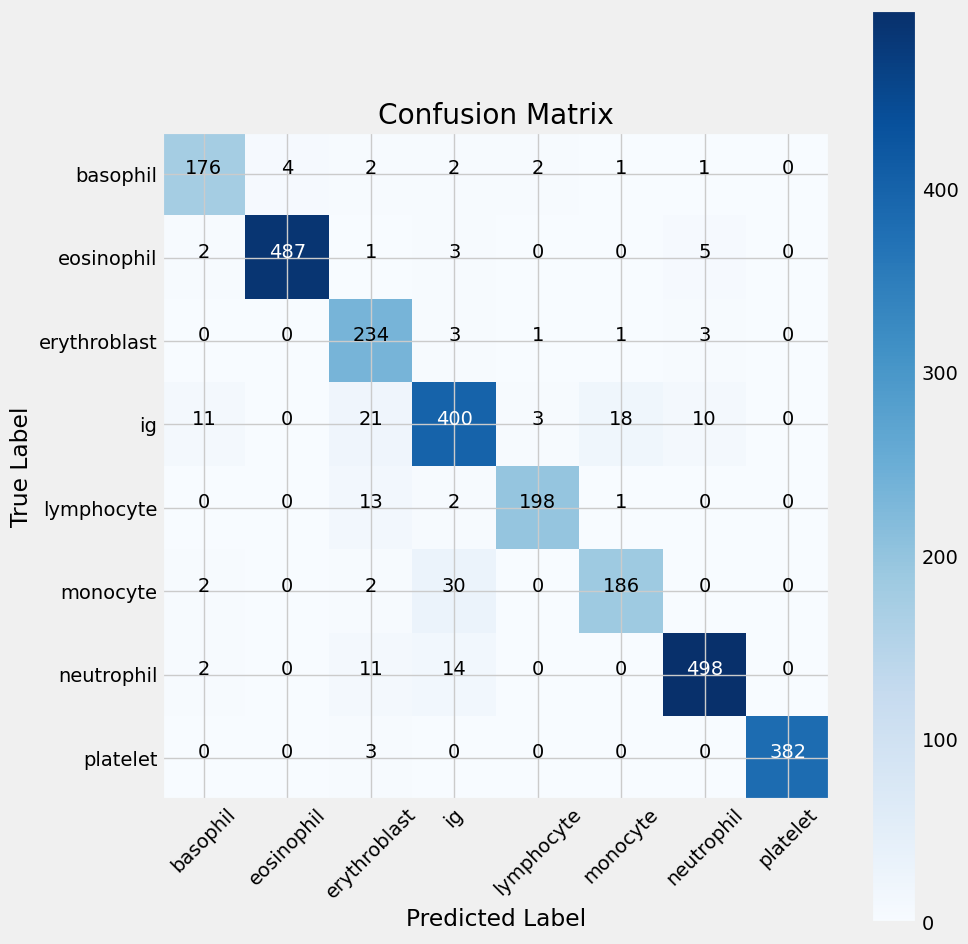

In [ ]:
g_dict = df_testgen.class_indices
classes = list(g_dict.keys())

cm = confusion_matrix(df_testgen.classes, y_pred)

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

With this confusion matrix we get to know that the model we have created is able to get us some great results, as the model is able to identify the key lables acurately which is very visible through the matrix.

In [ ]:
print(classification_report(df_testgen.classes, y_pred, target_names= classes))

              precision    recall  f1-score   support

    basophil       0.91      0.94      0.92       188
  eosinophil       0.99      0.98      0.98       498
erythroblast       0.82      0.97      0.88       242
          ig       0.88      0.86      0.87       463
  lymphocyte       0.97      0.93      0.95       214
    monocyte       0.90      0.85      0.87       220
  neutrophil       0.96      0.95      0.96       525
    platelet       1.00      0.99      1.00       385

    accuracy                           0.94      2735
   macro avg       0.93      0.93      0.93      2735
weighted avg       0.94      0.94      0.94      2735



The precision score we get shows that for most of the lable our data is able to understand and predict the image as they should be.

# **Conclusion and findings**

1. The test accuracy (93.64%) represents that the model is able to recognise blood cell types which is important for initital blood cancer detection.

2. Automated blood cell classification will help in minimal errors.

3. The model is very crucial for effective operation.

4. The confusion matrix represents how well the model is able to recognise the key blood cells.